In [2]:
from sppl.compilers.ast_to_spe import Id
from sppl.compilers.ast_to_spe import IfElse
from sppl.compilers.ast_to_spe import Otherwise
from sppl.compilers.ast_to_spe import Sample
from sppl.compilers.ast_to_spe import IdArray
from sppl.compilers.ast_to_spe import For
from sppl.compilers.ast_to_spe import Sequence
from sppl.compilers.ast_to_spe import Transform
from sppl.distributions import bernoulli
from sppl.distributions import randint
from sppl.sym_util import binspace
from sppl.math_util import allclose

import numpy as np

In [3]:
%reload_ext sppl.magics

In [111]:
p_digit1 = [[0.2, 0.05, 0.15, 0.1, 0.1, 0.05, 0.05, 0.1, 0.1, 0.1]]
p_digit2 = [[0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.3]]


In [112]:
# digits = digit0(0.4), digit1(0.3), digit2(0.2), digit3(0.1) #nn output
# auxdigit0 = 0.4
# auxdigit1 = 0.5
# auxdigit2 = 0.67
# digit0 = auxdigit0
# digit1 = auxdigit1, not auxdigit0
# digit2 = not auxdigit0, not auxdigit1, auxdigit2 

# auxdigitn = P/(1 - acumulado)
# auxdigit1 = 0.3/(1 - 0.4)
# auxdigit2 = 0.2/(1 - 0.4 - 0.3)
# auxdigit3 = 0.1/(1 - 0.4 - 0.3 - 0.2)

def get_indep_probs(p_digits):
    aux_digit = [0.0 for _ in range(10)]
    aux_digit[0] = p_digits[0]
    accum_sum = aux_digit[0]
    for i in range(1, 9):
        aux_digit[i] = (p_digits[i]/(1-accum_sum) )
        accum_sum += p_digits[i]
    aux_digit[9] = 1.0
    return aux_digit


In [115]:
def run_model(aux1, aux2):
    n = len(p_digit1)
    digit1_0 = IdArray("digit1_0", n) 
    digit1_1 = IdArray("digit1_1", n)
    digit1_2 = IdArray("digit1_2", n)
    digit1_3 = IdArray("digit1_3", n)
    digit1_4 = IdArray("digit1_4", n)
    digit1_5 = IdArray("digit1_5", n)
    digit1_6 = IdArray("digit1_6", n)
    digit1_7 = IdArray("digit1_7", n)
    digit1_8 = IdArray("digit1_8", n)
    digit1_9 = IdArray("digit1_9", n)
    digit2_0 = IdArray("digit2_0", n) 
    digit2_1 = IdArray("digit2_1", n)
    digit2_2 = IdArray("digit2_2", n)
    digit2_3 = IdArray("digit2_3", n)
    digit2_4 = IdArray("digit2_4", n)
    digit2_5 = IdArray("digit2_5", n)
    digit2_6 = IdArray("digit2_6", n)
    digit2_7 = IdArray("digit2_7", n)
    digit2_8 = IdArray("digit2_8", n)
    digit2_9 = IdArray("digit2_9", n)
    
    program = Sequence(
        For(0, n, lambda i:
            Sequence(
                Sample(digit1_0[i], bernoulli(p=p_digit1[i][0])),
                Sample(digit1_1[i], bernoulli(p=p_digit1[i][1])),
                Sample(digit1_2[i], bernoulli(p=p_digit1[i][2])),
                Sample(digit1_3[i], bernoulli(p=p_digit1[i][3])),
                Sample(digit1_4[i], bernoulli(p=p_digit1[i][4])),
                Sample(digit1_5[i], bernoulli(p=p_digit1[i][5])),
                Sample(digit1_6[i], bernoulli(p=p_digit1[i][6])),
                Sample(digit1_7[i], bernoulli(p=p_digit1[i][7])),
                Sample(digit1_8[i], bernoulli(p=p_digit1[i][8])),
                Sample(digit1_9[i], bernoulli(p=p_digit1[i][9])),
                Sample(digit2_0[i], bernoulli(p=p_digit2[i][0])),
                Sample(digit2_1[i], bernoulli(p=p_digit2[i][1])),
                Sample(digit2_2[i], bernoulli(p=p_digit2[i][2])),
                Sample(digit2_3[i], bernoulli(p=p_digit2[i][3])),
                Sample(digit2_4[i], bernoulli(p=p_digit2[i][4])),
                Sample(digit2_5[i], bernoulli(p=p_digit2[i][5])),
                Sample(digit2_6[i], bernoulli(p=p_digit2[i][6])),
                Sample(digit2_7[i], bernoulli(p=p_digit2[i][7])),
                Sample(digit2_8[i], bernoulli(p=p_digit2[i][8])),
                Sample(digit2_9[i], bernoulli(p=p_digit2[i][9]))
            ),
        ),
    )
    model = program.interpret()
    probs = []
    for i in range(n):
        sum0 = (digit1_0[i] << {1} & digit2_0[i] << {1})            
        sum1 = ((digit1_0[i] << {1} & digit2_1[i] << {1}) | (digit1_1[i] << {1} & digit2_0[i] << {1}))
        sum2 = ((digit1_0[i] << {1} & digit2_2[i] << {1}) | (digit1_2[i] << {1} & digit2_0[i] << {1}) | (digit1_1[i] << {1} & digit2_1[i] << {1}))
        sum3 = ((digit1_0[i] << {1} & digit2_3[i] << {1}) | (digit1_3[i] << {1} & digit2_0[i] << {1}) | (digit1_1[i] << {1} & digit2_2[i] << {1}) | (digit1_2[i] << {1} & digit2_1[i] << {1}))    
        sum4 = ((digit1_0[i] << {1} & digit2_4[i] << {1}) | (digit1_4[i] << {1} & digit2_0[i] << {1}) | (digit1_1[i] << {1} & digit2_3[i] << {1}) | (digit1_3[i] << {1} & digit2_1[i] << {1}) | (digit1_2[i] << {1} & digit2_2[i] << {1}))
        sum5 = ((digit1_0[i] << {1} & digit2_5[i] << {1}) | (digit1_5[i] << {1} & digit2_0[i] << {1}) | (digit1_1[i] << {1} & digit2_4[i] << {1}) | (digit1_4[i] << {1} & digit2_1[i] << {1}) | (digit1_2[i] << {1} & digit2_3[i] << {1}) | (digit1_3[i] << {1} & digit2_2[i] << {1}))
        sum6 = ((digit1_0[i] << {1} & digit2_6[i] << {1}) | (digit1_6[i] << {1} & digit2_0[i] << {1}) | (digit1_1[i] << {1} & digit2_5[i] << {1}) | (digit1_5[i] << {1} & digit2_1[i] << {1}) | (digit1_2[i] << {1} & digit2_4[i] << {1}) | (digit1_4[i] << {1} & digit2_2[i] << {1}) | (digit1_3[i] << {1} & digit2_3[i] << {1}))
        sum7 = ((digit1_0[i] << {1} & digit2_7[i] << {1}) | (digit1_7[i] << {1} & digit2_0[i] << {1}) | (digit1_1[i] << {1} & digit2_6[i] << {1}) | (digit1_6[i] << {1} & digit2_1[i] << {1}) | (digit1_2[i] << {1} & digit2_5[i] << {1}) | (digit1_5[i] << {1} & digit2_2[i] << {1}) | (digit1_3[i] << {1} & digit2_4[i] << {1}) | (digit1_4[i] << {1} & digit2_3[i] << {1}))
        sum8 = ((digit1_0[i] << {1} & digit2_8[i] << {1}) | (digit1_8[i] << {1} & digit2_0[i] << {1}) | (digit1_1[i] << {1} & digit2_7[i] << {1}) | (digit1_7[i] << {1} & digit2_1[i] << {1}) | (digit1_2[i] << {1} & digit2_6[i] << {1}) | (digit1_6[i] << {1} & digit2_2[i] << {1}) | (digit1_3[i] << {1} & digit2_5[i] << {1}) | (digit1_5[i] << {1} & digit2_3[i] << {1}) | (digit1_4[i] << {1} & digit2_4[i] << {1}))
        sum9 = ((digit1_0[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_0[i] << {1}) | (digit1_1[i] << {1} & digit2_8[i] << {1}) | (digit1_8[i] << {1} & digit2_1[i] << {1}) | (digit1_2[i] << {1} & digit2_7[i] << {1}) | (digit1_7[i] << {1} & digit2_2[i] << {1}) | (digit1_3[i] << {1} & digit2_6[i] << {1}) | (digit1_6[i] << {1} & digit2_3[i] << {1}) | (digit1_4[i] << {1} & digit2_5[i] << {1}) | (digit1_5[i] << {1} & digit2_4[i] << {1}))
        sum10 = ((digit1_1[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_1[i] << {1}) | (digit1_2[i] << {1} & digit2_8[i] << {1}) | (digit1_8[i] << {1} & digit2_2[i] << {1}) | (digit1_3[i] << {1} & digit2_7[i] << {1}) | (digit1_7[i] << {1} & digit2_3[i] << {1}) | (digit1_4[i] << {1} & digit2_6[i] << {1}) | (digit1_6[i] << {1} & digit2_4[i] << {1}) | (digit1_5[i] << {1} & digit2_5[i] << {1}))
        sum11 = ((digit1_2[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_2[i] << {1}) | (digit1_3[i] << {1} & digit2_8[i] << {1}) | (digit1_8[i] << {1} & digit2_3[i] << {1}) | (digit1_4[i] << {1} & digit2_7[i] << {1}) | (digit1_7[i] << {1} & digit2_4[i] << {1}) | (digit1_5[i] << {1} & digit2_6[i] << {1}) | (digit1_6[i] << {1} & digit2_5[i] << {1}))
        sum12 = ((digit1_3[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_3[i] << {1}) | (digit1_4[i] << {1} & digit2_8[i] << {1}) | (digit1_8[i] << {1} & digit2_4[i] << {1}) | (digit1_5[i] << {1} & digit2_7[i] << {1}) | (digit1_6[i] << {1} & digit2_6[i] << {1}))
        sum13 = ((digit1_4[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_4[i] << {1}) | (digit1_5[i] << {1} & digit2_8[i] << {1}) | (digit1_8[i] << {1} & digit2_5[i] << {1}) | (digit1_6[i] << {1} & digit2_7[i] << {1}) | (digit1_7[i] << {1} & digit2_6[i] << {1}))
        sum14 = ((digit1_5[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_5[i] << {1}) | (digit1_6[i] << {1} & digit2_8[i] << {1}) | (digit1_8[i] << {1} & digit2_6[i] << {1}) | (digit1_7[i] << {1} & digit2_7[i] << {1}))
        sum15 = ((digit1_6[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_6[i] << {1}) | (digit1_7[i] << {1} & digit2_8[i] << {1}) | (digit1_8[i] << {1} & digit2_7[i] << {1}))
        sum16 = ((digit1_7[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_7[i] << {1}) | (digit1_8[i] << {1} & digit2_8[i] << {1}))
        sum17 = ((digit1_8[i] << {1} & digit2_9[i] << {1}) | (digit1_9[i] << {1} & digit2_8[i] << {1}))
        sum18 = (digit1_9[i] << {1} & digit2_9[i] << {1})

        probs.append([model.prob(sum0), model.prob(sum1), model.prob(sum2), model.prob(sum3), model.prob(sum4),
        model.prob(sum5), model.prob(sum6), model.prob(sum7), model.prob(sum8), model.prob(sum9),
        model.prob(sum10), model.prob(sum11), model.prob(sum12), model.prob(sum13), model.prob(sum14),
        model.prob(sum15), model.prob(sum16), model.prob(sum17), model.prob(sum18)
        ])
    return probs
    # auxdigits1 = IdArray("auxdigits1", 10)
    # auxdigits2 = IdArray("auxdigits2", 10)
    # program = Sequence(
    #     For(0, 10, lambda i: 
    #         Sequence(
    #             Sample(auxdigits1[i], bernoulli(p=aux1[i])),
    #             Sample(auxdigits2[i], bernoulli(p=aux2[i])),
    #         ),
    #     ),
    # )
    # model = program.interpret()
    # digit1_0 = (auxdigits1[0] << {1})
    # digit1_1 = (auxdigits1[1] << {1} & auxdigits1[0] << {0})
    # digit1_2 = (auxdigits1[2] << {1} & auxdigits1[0] << {0} & auxdigits1[1] << {0})
    # digit1_3 = (auxdigits1[3] << {1} & auxdigits1[0] << {0} & auxdigits1[1] << {0} & auxdigits1[2] << {0})
    # digit1_4 = (auxdigits1[4] << {1} & auxdigits1[0] << {0} & auxdigits1[1] << {0} & auxdigits1[2] << {0} & auxdigits1[3] << {0})
    # digit1_5 = (auxdigits1[5] << {1} & auxdigits1[0] << {0} & auxdigits1[1] << {0} & auxdigits1[2] << {0} & auxdigits1[3] << {0} & auxdigits1[4] << {0})
    # digit1_6 = (auxdigits1[6] << {1} & auxdigits1[0] << {0} & auxdigits1[1] << {0} & auxdigits1[2] << {0} & auxdigits1[3] << {0} & auxdigits1[4] << {0} & auxdigits1[5] << {0})
    # digit1_7 = (auxdigits1[7] << {1} & auxdigits1[0] << {0} & auxdigits1[1] << {0} & auxdigits1[2] << {0} & auxdigits1[3] << {0} & auxdigits1[4] << {0} & auxdigits1[5] << {0} & auxdigits1[6] << {0})
    # digit1_8 = (auxdigits1[8] << {1} & auxdigits1[0] << {0} & auxdigits1[1] << {0} & auxdigits1[2] << {0} & auxdigits1[3] << {0} & auxdigits1[4] << {0} & auxdigits1[5] << {0} & auxdigits1[6] << {0} & auxdigits1[7] << {0})
    # digit1_9 = (auxdigits1[9] << {1} & auxdigits1[0] << {0} & auxdigits1[1] << {0} & auxdigits1[2] << {0} & auxdigits1[3] << {0} & auxdigits1[4] << {0} & auxdigits1[5] << {0} & auxdigits1[6] << {0} & auxdigits1[7] << {0} & auxdigits1[8] << {0})

    # digit2_0 = (auxdigits2[0] << {1})
    # digit2_1 = (auxdigits2[1] << {1} & auxdigits2[0] << {0})
    # digit2_2 = (auxdigits2[2] << {1} & auxdigits2[0] << {0} & auxdigits2[1] << {0})
    # digit2_3 = (auxdigits2[3] << {1} & auxdigits2[0] << {0} & auxdigits2[1] << {0} & auxdigits2[2] << {0})
    # digit2_4 = (auxdigits2[4] << {1} & auxdigits2[0] << {0} & auxdigits2[1] << {0} & auxdigits2[2] << {0} & auxdigits2[3] << {0})
    # digit2_5 = (auxdigits2[5] << {1} & auxdigits2[0] << {0} & auxdigits2[1] << {0} & auxdigits2[2] << {0} & auxdigits2[3] << {0} & auxdigits2[4] << {0})
    # digit2_6 = (auxdigits2[6] << {1} & auxdigits2[0] << {0} & auxdigits2[1] << {0} & auxdigits2[2] << {0} & auxdigits2[3] << {0} & auxdigits2[4] << {0} & auxdigits2[5] << {0})
    # digit2_7 = (auxdigits2[7] << {1} & auxdigits2[0] << {0} & auxdigits2[1] << {0} & auxdigits2[2] << {0} & auxdigits2[3] << {0} & auxdigits2[4] << {0} & auxdigits2[5] << {0} & auxdigits2[6] << {0})
    # digit2_8 = (auxdigits2[8] << {1} & auxdigits2[0] << {0} & auxdigits2[1] << {0} & auxdigits2[2] << {0} & auxdigits2[3] << {0} & auxdigits2[4] << {0} & auxdigits2[5] << {0} & auxdigits2[6] << {0} & auxdigits2[7] << {0})
    # digit2_9 = (auxdigits2[9] << {1} & auxdigits2[0] << {0} & auxdigits2[1] << {0} & auxdigits2[2] << {0} & auxdigits2[3] << {0} & auxdigits2[4] << {0} & auxdigits2[5] << {0} & auxdigits2[6] << {0} & auxdigits2[7] << {0} & auxdigits2[8] << {0})

    # digit1_0 = Id("digit1_0") 
    # digit1_1 = Id("digit1_1")
    # digit1_2 = Id("digit1_2")
    # digit1_3 = Id("digit1_3")
    # digit1_4 = Id("digit1_4")
    # digit1_5 = Id("digit1_5")
    # digit1_6 = Id("digit1_6")
    # digit1_7 = Id("digit1_7")
    # digit1_8 = Id("digit1_8")
    # digit1_9 = Id("digit1_9")
    # digit2_0 = Id("digit2_0") 
    # digit2_1 = Id("digit2_1")
    # digit2_2 = Id("digit2_2")
    # digit2_3 = Id("digit2_3")
    # digit2_4 = Id("digit2_4")
    # digit2_5 = Id("digit2_5")
    # digit2_6 = Id("digit2_6")
    # digit2_7 = Id("digit2_7")
    # digit2_8 = Id("digit2_8")
    # digit2_9 = Id("digit2_9")
    
    # program = Sequence(
    #     Sample(digit1_0, bernoulli(p=p_digit1[0])),
    #     Sample(digit1_1, bernoulli(p=p_digit1[1])),
    #     Sample(digit1_2, bernoulli(p=p_digit1[2])),
    #     Sample(digit1_3, bernoulli(p=p_digit1[3])),
    #     Sample(digit1_4, bernoulli(p=p_digit1[4])),
    #     Sample(digit1_5, bernoulli(p=p_digit1[5])),
    #     Sample(digit1_6, bernoulli(p=p_digit1[6])),
    #     Sample(digit1_7, bernoulli(p=p_digit1[7])),
    #     Sample(digit1_8, bernoulli(p=p_digit1[8])),
    #     Sample(digit1_9, bernoulli(p=p_digit1[9])),
    #     Sample(digit2_0, bernoulli(p=p_digit2[0])),
    #     Sample(digit2_1, bernoulli(p=p_digit2[1])),
    #     Sample(digit2_2, bernoulli(p=p_digit2[2])),
    #     Sample(digit2_3, bernoulli(p=p_digit2[3])),
    #     Sample(digit2_4, bernoulli(p=p_digit2[4])),
    #     Sample(digit2_5, bernoulli(p=p_digit2[5])),
    #     Sample(digit2_6, bernoulli(p=p_digit2[6])),
    #     Sample(digit2_7, bernoulli(p=p_digit2[7])),
    #     Sample(digit2_8, bernoulli(p=p_digit2[8])),
    #     Sample(digit2_9, bernoulli(p=p_digit2[9])),
    # )
    # model = program.interpret()
    # sum0 = (digit1_0 << {1} & digit2_0 << {1})
    # sum1 = ((digit1_0 << {1} & digit2_1 << {1}) | (digit1_1 << {1} & digit2_0 << {1}))
    # sum2 = ((digit1_0 << {1} & digit2_2 << {1}) | (digit1_2 << {1} & digit2_0 << {1}) | (digit1_1 & digit2_1))
    # sum3 = ((digit1_0 << {1} & digit2_3 << {1}) | (digit1_3 << {1} & digit2_0 << {1}) | (digit1_1 & digit2_2) | (digit1_2 & digit2_1))    
    # sum4 = ((digit1_0 << {1} & digit2_4 << {1}) | (digit1_4 << {1} & digit2_0 << {1}) | (digit1_1 & digit2_3) | (digit1_3 & digit2_1) | (digit1_2 & digit2_2))
    # sum5 = ((digit1_0 << {1} & digit2_5 << {1}) | (digit1_5 << {1} & digit2_0 << {1}) | (digit1_1 & digit2_4) | (digit1_4 & digit2_1) | (digit1_2 & digit2_3) | (digit1_3 & digit2_2))
    # sum6 = ((digit1_0 << {1} & digit2_6 << {1}) | (digit1_6 << {1} & digit2_0 << {1}) | (digit1_1 & digit2_5) | (digit1_5 & digit2_1) | (digit1_2 & digit2_4) | (digit1_4 & digit2_2) | (digit1_3 & digit2_3))
    # sum7 = ((digit1_0 << {1} & digit2_7 << {1}) | (digit1_7 << {1} & digit2_0 << {1}) | (digit1_1 & digit2_6) | (digit1_6 & digit2_1) | (digit1_2 & digit2_5) | (digit1_5 & digit2_2) | (digit1_3 & digit2_4) | (digit1_4 & digit2_3))
    # sum8 = ((digit1_0 << {1} & digit2_8 << {1}) | (digit1_8 << {1} & digit2_0 << {1}) | (digit1_1 & digit2_7) | (digit1_7 & digit2_1) | (digit1_2 & digit2_6) | (digit1_6 & digit2_2) | (digit1_3 & digit2_5) | (digit1_5 & digit2_3) | (digit1_4 & digit2_4))
    # sum9 = ((digit1_0 << {1} & digit2_9 << {1}) | (digit1_9 << {1} & digit2_0 << {1}) | (digit1_1 & digit2_8) | (digit1_8 & digit2_1) | (digit1_2 & digit2_7) | (digit1_7 & digit2_2) | (digit1_3 & digit2_6) | (digit1_6 & digit2_3) | (digit1_4 & digit2_5) | (digit1_5 & digit2_4))
    # sum10 = ((digit1_1 & digit2_9) | (digit1_9 & digit2_1) | (digit1_2 & digit2_8) | (digit1_8 & digit2_2) | (digit1_3 & digit2_7) | (digit1_7 & digit2_3) | (digit1_4 & digit2_6) | (digit1_6 & digit2_4) | (digit1_5 & digit2_5))
    # sum11 = ((digit1_2 & digit2_9) | (digit1_9 & digit2_2) | (digit1_3 & digit2_8) | (digit1_8 & digit2_3) | (digit1_4 & digit2_7) | (digit1_7 & digit2_4) | (digit1_5 & digit2_6) | (digit1_6 & digit2_5))
    # sum12 = ((digit1_3 & digit2_9) | (digit1_9 & digit2_3) | (digit1_4 & digit2_8) | (digit1_8 & digit2_4) | (digit1_5 & digit2_7) | (digit1_6 & digit2_6))
    # sum13 = ((digit1_4 & digit2_9) | (digit1_9 & digit2_4) | (digit1_5 & digit2_8) | (digit1_8 & digit2_5) | (digit1_6 & digit2_7) | (digit1_7 & digit2_6))
    # sum14 = ((digit1_5 & digit2_9) | (digit1_9 & digit2_5) | (digit1_6 & digit2_8) | (digit1_8 & digit2_6) | (digit1_7 & digit2_7))
    # sum15 = ((digit1_6 & digit2_9) | (digit1_9 & digit2_6) | (digit1_7 & digit2_8) | (digit1_8 & digit2_7))
    # sum16 = ((digit1_7 & digit2_9) | (digit1_9 & digit2_7) | (digit1_8 & digit2_8))
    # sum17 = ((digit1_8 & digit2_9) | (digit1_9 & digit2_8))
    # sum18 = (digit1_9 & digit2_9)
    
    # return [model.prob(sum0), model.prob(sum1), model.prob(sum2), model.prob(sum3), model.prob(sum4),
    #         model.prob(sum5), model.prob(sum6), model.prob(sum7), model.prob(sum8), model.prob(sum9),
    #         model.prob(sum10), model.prob(sum11), model.prob(sum12), model.prob(sum13), model.prob(sum14),
    #         model.prob(sum15), model.prob(sum16), model.prob(sum17), model.prob(sum18)
    #         ]
    
    return model.prob(digit2_0 << {1})
# aux1 = get_indep_probs(p_digit1)
# aux2 = get_indep_probs(p_digit2)

probs = run_model(p_digit1, p_digit2)
print(probs)

[[0.010000000000000004, 0.022450000000000015, 0.03221325000000001, 0.044328867500000035, 0.053885578825000016, 0.060993322843375046, 0.056154563945782214, 0.07035991444801236, 0.07497281118945788, 0.1238366722365881, 0.08191586708428159, 0.09860461613418807, 0.06585713034962502, 0.06349227156212502, 0.044231350037500006, 0.039428492499999995, 0.04930299999999999, 0.0397, 0.029999999999999995]]


In [ ]:

# print(aux1)
# print(p_digit1)
# print(probs)


0.10000000000000002


In [4]:
%%sppl model

p0_d1 ~= beta(a=1, b=1)
p1_d1 ~= beta(a=1, b=1)
p2_d1 ~= beta(a=1, b=1)
p3_d1 ~= beta(a=1, b=1)
p4_d1 ~= beta(a=1, b=1)
p5_d1 ~= beta(a=1, b=1)
p6_d1 ~= beta(a=1, b=1)
p7_d1 ~= beta(a=1, b=1)
p8_d1 ~= beta(a=1, b=1)
p9_d1 ~= beta(a=1, b=1)

# p_digit2 = [0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.3]
p0_d2 ~= beta(a=1, b=1)
p1_d2 ~= beta(a=1, b=1)
p2_d2 ~= beta(a=1, b=1)
p3_d2 ~= beta(a=1, b=1)
p4_d2 ~= beta(a=1, b=1)
p5_d2 ~= beta(a=1, b=1)
p6_d2 ~= beta(a=1, b=1)
p7_d2 ~= beta(a=1, b=1)
p8_d2 ~= beta(a=1, b=1)
p9_d2 ~= beta(a=1, b=1)

[0.2, 0.0625, 0.19999999999999998, 0.16666666666666669, 0.2, 0.125, 0.14285714285714288, 0.3333333333333334, 0.5000000000000001, 1.0000000000000002]


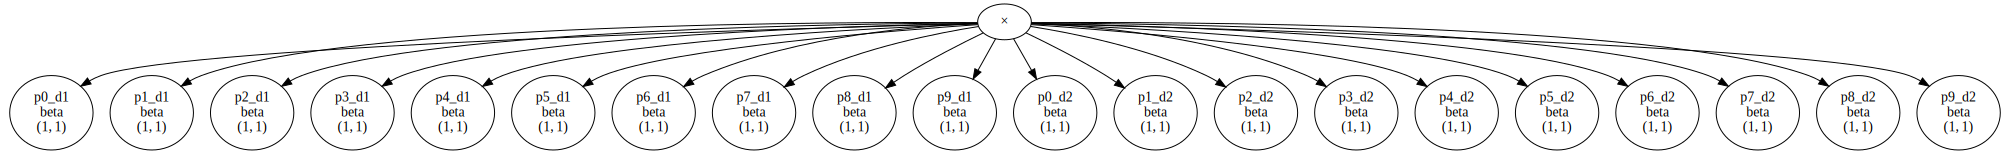

In [41]:
n = %sppl_get_namespace model
# n.model.condition(n.p0_d1 << {1})

# digits = digit0(0.4), digit1(0.3), digit2(0.2), digit3(0.1) #nn output
# auxdigit0 = 0.4
# auxdigit1 = 0.5
# auxdigit2 = 0.67
# digit0 = auxdigit0
# digit1 = auxdigit1, not auxdigit0
# digit2 = not auxdigit0, not auxdigit1, auxdigit2 

# auxdigitn = P/(1 - acumulado)
# auxdigit1 = 0.3/(1 - 0.4)
# auxdigit2 = 0.2/(1 - 0.4 - 0.3)

aux_digit1 = [0.0 for _ in range(10)]
aux_digit1[0] = p_digit1[0]
accum_sum = aux_digit1[0]
for i in range(1, 10):
    aux_digit1[i] = (p_digit1[i]/(1-accum_sum) )
    accum_sum += p_digit1[i]
print(aux_digit1)
digit0 = n.model.condition(n.p0_d1 < aux_digit1[0])
digit1 = n.model.condition((n.p1_d1 < aux_digit1[1]) & (n.p0_d1 >= aux_digit1[0]))
print(digit0)

%sppl_to_graph model
# modelc = n.model.condition((0.2 < n.p1) < 2)
# print(n.model.prob(n.p0_d1 << {0}))
# print(n.model.prob(n.p1_d1 << {0}))
# digit1 = n.model.prob(n.p0_d1 << {1} & n.p1_d1 << {0})
# print(digit1)


In [182]:
m = %sppl_to_python model

# IMPORT STATEMENTS
from sppl.distributions import bernoulli
from sppl.compilers.ast_to_spe import Id
from sppl.compilers.ast_to_spe import IdArray
from sppl.compilers.ast_to_spe import Condition
from sppl.compilers.ast_to_spe import Constrain
from sppl.compilers.ast_to_spe import IfElse
from sppl.compilers.ast_to_spe import For
from sppl.compilers.ast_to_spe import Sample
from sppl.compilers.ast_to_spe import Sequence
from sppl.compilers.ast_to_spe import Switch
from sppl.compilers.ast_to_spe import Transform

# VARIABLE DECLARATIONS
prob1 = Id('prob1')

# MODEL DEFINITION
command = Sequence(
    Sample(prob1, bernoulli(p=0.5)),
)
model = command.interpret()

